# Import Librarys

In [1]:
import project
import pandas                   as pd
import numpy                    as np
import scikitplot               as skplt
from sklearn.model_selection    import StratifiedKFold
from sklearn.ensemble           import RandomForestClassifier

# Load the data

In [2]:
cols_selected = ['annual_premium', 'vintage', 'age', 'region_code', 'vehicle_damage', 'previously_insured', 'policy_sales_channel']

df5 = pd.read_csv('../data/dataframe_steps/df5.csv')
x_val = pd.read_csv('../data/dataframe_steps/x_val_pp.csv')

x_train = df5[ cols_selected ]
y_train = df5['response']

x_val1 = x_val[ cols_selected ]
y_val = pd.read_csv('../data/dataframe_steps/y_val.csv')

In [3]:
# append dataframes for cross-validation
cv_x = pd.concat([x_train, x_val1])
cv_y = pd.concat([pd.DataFrame(y_train), y_val])

# dataset for cross validation
dataset = cv_x
dataset['response'] = cv_y

k = int(x_val.shape[0]*0.4)

# Random Forest Model

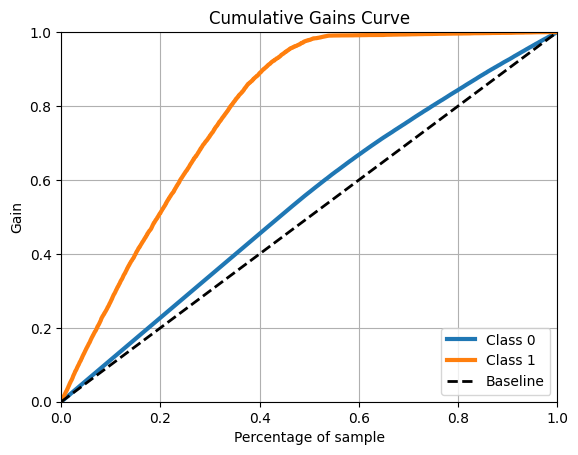

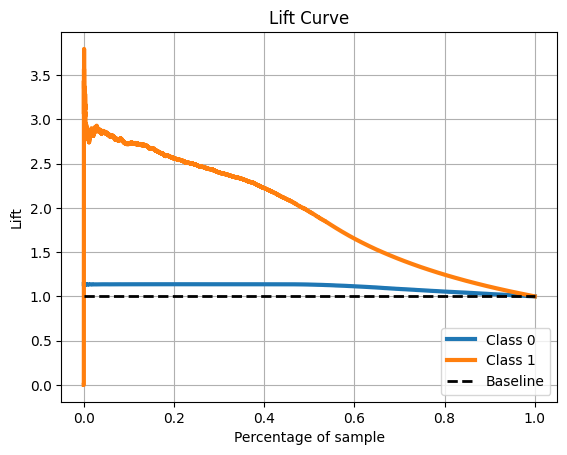

In [4]:
# model definition
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
# model training
rf_model.fit( x_train, y_train )

# model prediction
yhat_rf = rf_model.predict_proba( x_val1 )

# Accumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_rf );

# Lift Curve
skplt.metrics.plot_lift_curve(y_val, yhat_rf);

In [5]:
insurance = project.ProjectFunctions()
rf_score = insurance.make_score(x_val, y_val, yhat_rf)

# compute precision at K
precision_at_n_k = insurance.precision_at_k( rf_score, k=k )
print( f'Precision at K: {precision_at_n_k}' )

# compute recall at K
recall_at_n_k = insurance.recall_at_k( rf_score, k=k )
print( f'Recall    at K: {recall_at_n_k}')

Precision at K: 0.27232772475318967
Recall    at K: 0.8887818454292443


In [6]:
skf = StratifiedKFold(n_splits=10)

model = rf_model

knn_cv = insurance.stratifield_cross_validation( x_data=cv_x, y_data=cv_y,dataset=dataset, skf=skf, model=model, sample_size=0.4)

fold :1 | precision 0.27097 | recall 0.88439
fold :2 | precision 0.27314 | recall 0.89146
fold :3 | precision 0.27301 | recall 0.89103
fold :4 | precision 0.27714 | recall 0.90452
fold :5 | precision 0.26947 | recall 0.87947
fold :6 | precision 0.27314 | recall 0.89146
fold :7 | precision 0.27366 | recall 0.89317
fold :8 | precision 0.27445 | recall 0.89574
fold :9 | precision 0.27124 | recall 0.88525
fold :10 | precision 0.27156 | recall 0.88632
